# Principal Component Analysis with Cancer Data

In [0]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [0]:
import io

In [97]:
from google.colab import files
uploaded  = files.upload()

Saving breast-cancer-wisconsin-data.csv to breast-cancer-wisconsin-data (1).csv


In [0]:
data_raw = pd.read_csv(io.BytesIO(uploaded['breast-cancer-wisconsin-data.csv']))


In [0]:
data_train = data_raw.copy(deep=True)

In [152]:
data_train.shape

(699, 11)

In [153]:
data_train.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
## ID column is of no use so will drop it

data_train = data_train.drop(columns='ID')

In [155]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [156]:
data_train.isnull().any()

ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [158]:
data_train.shape

(699, 10)

In [159]:
data_train.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [160]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [0]:
## Bare Nuclei is showing as only column as Object so this have non numeric values other columns have only numeric values 

In [162]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [163]:
## checking for the missing data in each column

data_train.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [164]:
## checking for the duplicate data in each column

data_train.nunique()

ClumpThickness                 10
Cell Size                      10
Cell Shape                     10
Marginal Adhesion              10
Single Epithelial Cell Size    10
Bare Nuclei                    11
Normal Nucleoli                10
Bland Chromatin                10
Mitoses                         9
Class                           2
dtype: int64

In [165]:
data_train.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [0]:
data_train = data_train.drop_duplicates(keep='first')

In [167]:
data_train.shape

(463, 10)

In [168]:
data_raw.shape

(699, 11)

In [169]:
## checking for the incorrect data in each column

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 463 non-null int64
Cell Size                      463 non-null int64
Cell Shape                     463 non-null int64
Marginal Adhesion              463 non-null int64
Single Epithelial Cell Size    463 non-null int64
Bare Nuclei                    463 non-null object
Normal Nucleoli                463 non-null int64
Bland Chromatin                463 non-null int64
Mitoses                        463 non-null int64
Class                          463 non-null int64
dtypes: int64(9), object(1)
memory usage: 39.8+ KB


In [170]:
data_train['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [171]:
data_train['Bare Nuclei'].mode()

0    1
dtype: object

In [0]:
## Finding the non numeric values and replacing it with mode as it is 

In [173]:
data_train[~data_train['Bare Nuclei'].str.isdigit()]['Bare Nuclei']

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
617    ?
Name: Bare Nuclei, dtype: object

In [0]:
data_train['Bare Nuclei'] = data_train['Bare Nuclei'].replace(data_train[~data_train['Bare Nuclei'].str.isdigit()]['Bare Nuclei'],np.NaN)

In [175]:
data_train['Bare Nuclei'].isnull().unique()

array([False,  True])

In [0]:
data_train['Bare Nuclei'].fillna(method='ffill',inplace=True)

In [177]:
## Checking the non numeric digits

data_train[~data_train['Bare Nuclei'].str.isdigit()]['Bare Nuclei']

Series([], Name: Bare Nuclei, dtype: object)

In [178]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 463 non-null int64
Cell Size                      463 non-null int64
Cell Shape                     463 non-null int64
Marginal Adhesion              463 non-null int64
Single Epithelial Cell Size    463 non-null int64
Bare Nuclei                    463 non-null object
Normal Nucleoli                463 non-null int64
Bland Chromatin                463 non-null int64
Mitoses                        463 non-null int64
Class                          463 non-null int64
dtypes: int64(9), object(1)
memory usage: 59.8+ KB


In [0]:
data_train['Bare Nuclei'] = data_train['Bare Nuclei'].astype(np.int64)

In [180]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 463 non-null int64
Cell Size                      463 non-null int64
Cell Shape                     463 non-null int64
Marginal Adhesion              463 non-null int64
Single Epithelial Cell Size    463 non-null int64
Bare Nuclei                    463 non-null int64
Normal Nucleoli                463 non-null int64
Bland Chromatin                463 non-null int64
Mitoses                        463 non-null int64
Class                          463 non-null int64
dtypes: int64(10)
memory usage: 59.8 KB


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

In [0]:
#################### 3- Correlation Matrix with Heatmap ####################################

#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(15,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap = colormap,square=True,cbar_kws={'shrink':.5 }, ax=ax,annot=True,linewidths=0.1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

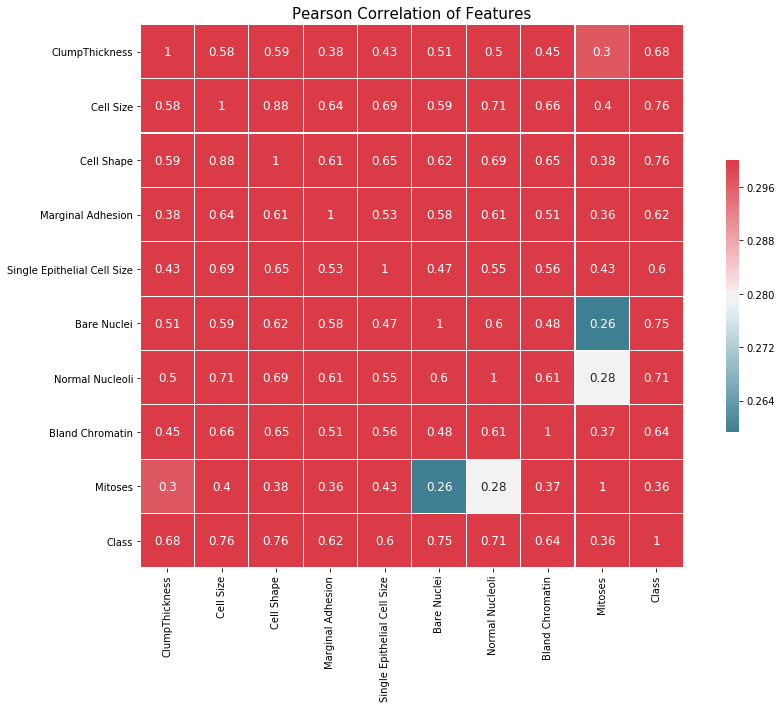

In [185]:
correlation_heatmap(data_train)

In [0]:
## we can see cell size is highly corrreated with cell shape so either of the columns can be dropped

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


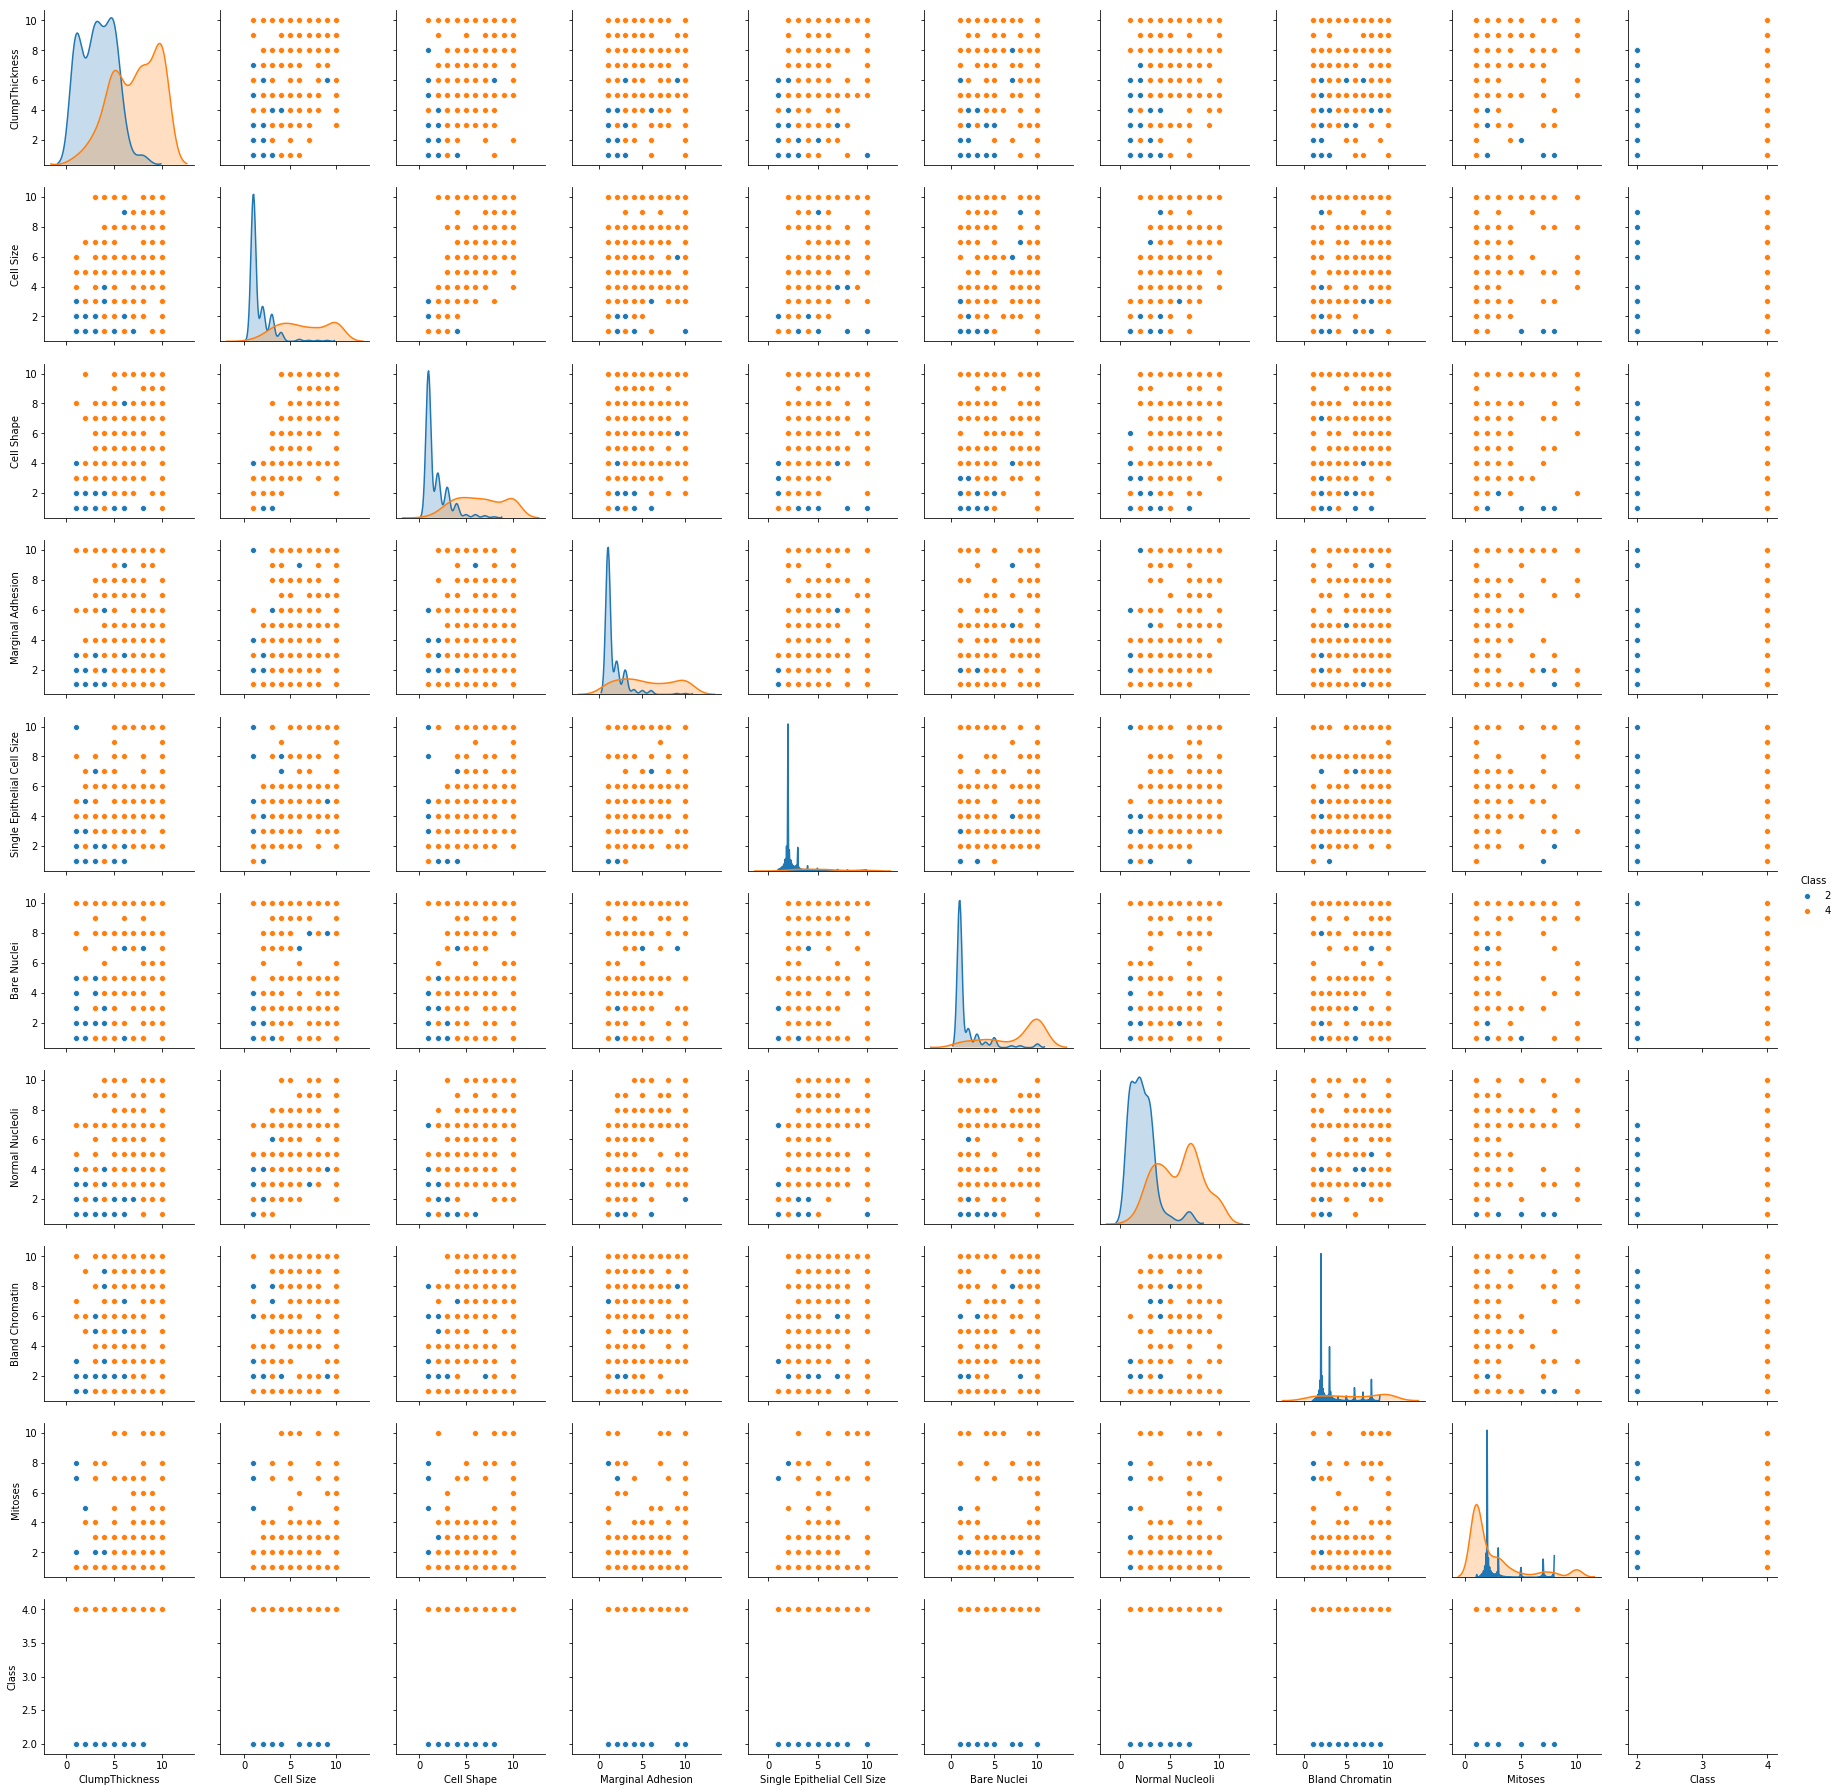

In [189]:
sns.pairplot(data_train,hue='Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

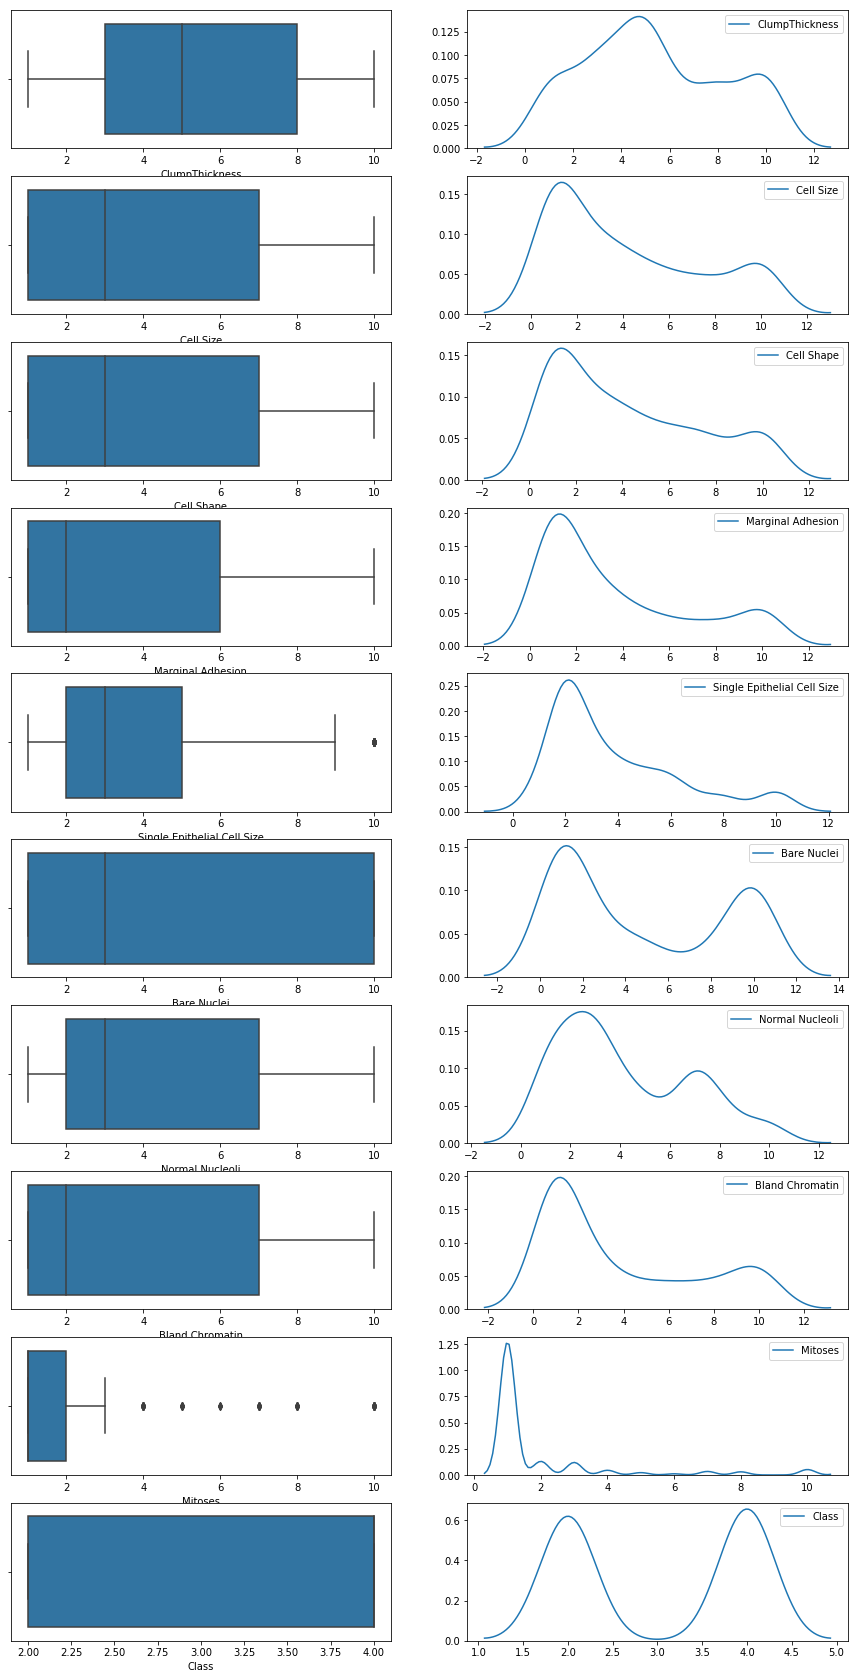

In [192]:
col_d = data_train.select_dtypes(exclude=['object']).columns
col=2
row = int(np.ceil(len(data_train.select_dtypes(exclude=['object']).columns)))
fig, qaxis = plt.subplots(row,col,figsize=(15,30))

i=0
j=0
k=0

for i in range (len(col_d)):
  
  ax1= sns.boxplot(x=data_train[col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data_train[col_d[i]],ax = qaxis[j,k])
 
  k=k+1
  j=j
  if k>=col:
    j=j+1
    k=0   
   

In [193]:
################################ OUTLIERS DETECTION #################################
out_compare = pd.DataFrame(columns=['Column_name'])

col=data_train.select_dtypes(exclude='object').columns

for i in range(len(col)):
  factor=2
  upper_lmt=data_train[col[i]].mean()+data_train[col[i]].std()*factor
  lower_lmt=data_train[col[i]].mean()-data_train[col[i]].std()*factor
  out_compare.loc[i,'Column_name']=col[i]
  out_compare.loc[i,'upper_lmt']=upper_lmt
  out_compare.loc[i,'lower_lmt']=lower_lmt
  out_compare.loc[i,'upper_outlier(%)']='{0:=5.2f} %'.format((data_train[(data_train[col[i]]>upper_lmt)==True][col[i]].count()/data_train[col[i]].count())*100)
  out_compare.loc[i,'lower_outlier(%)']='{0:<5.2f} %'.format((data_train[(data_train[col[i]]<lower_lmt)==True][col[i]].count()/data_train[col[i]].count())*100)


out_compare = out_compare.sort_values(by=['upper_outlier(%)','lower_outlier(%)'],ascending=False)
out_compare.set_index('Column_name',inplace=True)
out_compare

#Capping the outlier rows with Percentiles
#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)

,upper_lmt,lower_lmt,upper_outlier(%),lower_outlier(%)
Column_name,,,,
Marginal Adhesion,9.995705,-2.613415,11.88 %,0.00 %
Mitoses,5.972180,-2.201122,7.34 %,0.00 %
Single Epithelial Cell Size,8.734000,-1.053655,6.91 %,0.00 %
Normal Nucleoli,9.448630,-1.107377,4.32 %,0.00 %
ClumpThickness,11.071478,-0.423530,0.00 %,0.00 %
Cell Size,10.654237,-2.304345,0.00 %,0.00 %
Cell Shape,10.483275,-2.003794,0.00 %,0.00 %
Bare Nuclei,12.506822,-2.977664,0.00 %,0.00 %
Bland Chromatin,10.574360,-2.967449,0.00 %,0.00 %


In [194]:
#################### OUTLIERS TREATMENT and Verifying it after the treatment  ##################

col=data_train.select_dtypes(exclude='object').columns
out_fx_compare = pd.DataFrame(columns=['Column_name'])

for i in range(len(col)):
  #repl_value = out_compare.loc[col[i],'upper_lmt']
  repl_value = data_train[col[i]].mean()
  #print('column {}:- has mean value {}'.format(col[i],repl_value))
  data_train[col[i]].replace(data_train[(data_train[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement
  #data_train[col[i]].replace(data_train[(data_train[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]],repl_value,inplace=True)  ## value replacement
  
  out_fx_compare.loc[i,'Column_name']=col[i]
  out_fx_compare.loc[i,'upper_lmt_old']=out_compare.loc[col[i],'upper_lmt']
  out_fx_compare.loc[i,'lower_lmt_old']=out_compare.loc[col[i],'lower_lmt']
  out_fx_compare.loc[i,'upper_outlier_nw(%)']='{0:=5.2f} %'.format((data_train[(data_train[col[i]]>out_compare.loc[col[i],'upper_lmt'])==True][col[i]].count()/data_train[col[i]].count())*100)
  out_fx_compare.loc[i,'lower_outlier_nw(%)']='{0:<5.2f} %'.format((data_train[(data_train[col[i]]<out_compare.loc[col[i],'lower_lmt'])==True][col[i]].count()/data_train[col[i]].count())*100)
 
out_fx_compare = out_fx_compare.sort_values(by=['upper_lmt_old'],ascending=False)
out_fx_compare.set_index('Column_name',inplace=True)
out_fx_compare


,upper_lmt_old,lower_lmt_old,upper_outlier_nw(%),lower_outlier_nw(%)
Column_name,,,,
Bare Nuclei,12.506822,-2.977664,0.00 %,0.00 %
ClumpThickness,11.071478,-0.423530,0.00 %,0.00 %
Cell Size,10.654237,-2.304345,0.00 %,0.00 %
Bland Chromatin,10.574360,-2.967449,0.00 %,0.00 %
Cell Shape,10.483275,-2.003794,0.00 %,0.00 %
Marginal Adhesion,9.995705,-2.613415,0.00 %,0.00 %
Normal Nucleoli,9.448630,-1.107377,0.00 %,0.00 %
Single Epithelial Cell Size,8.734000,-1.053655,0.00 %,0.00 %
Mitoses,5.972180,-2.201122,0.00 %,0.00 %


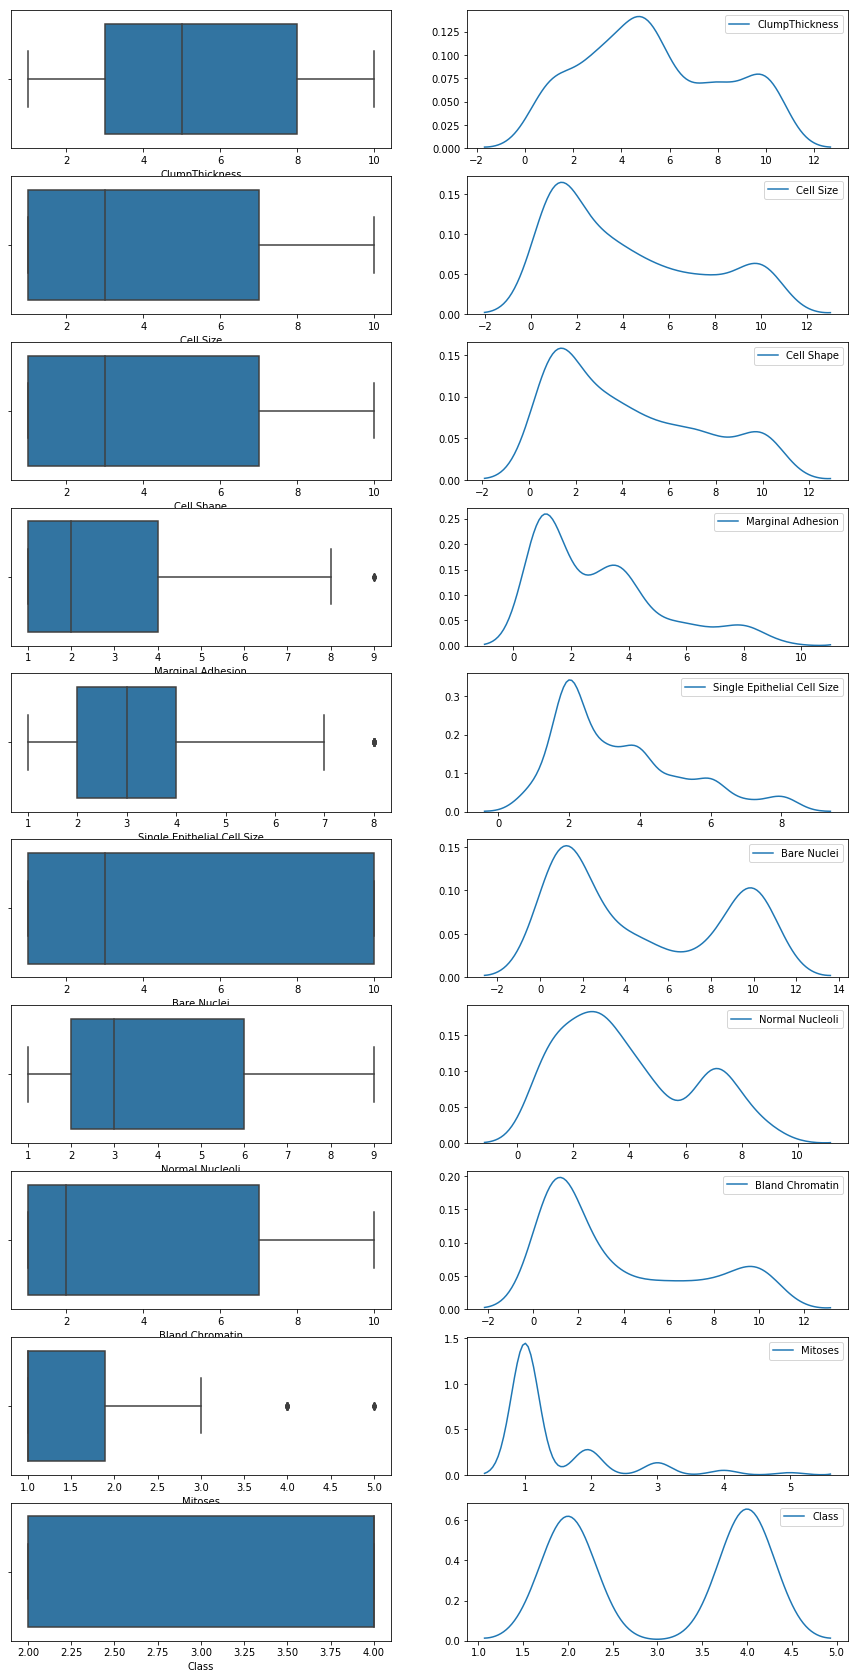

In [195]:
col_d = data_train.select_dtypes(exclude=['object']).columns
col=2
row = int(np.ceil(len(data_train.select_dtypes(exclude=['object']).columns)))
fig, qaxis = plt.subplots(row,col,figsize=(15,30))

i=0
j=0
k=0

for i in range (len(col_d)):
  
  ax1= sns.boxplot(x=data_train[col_d[i]], ax = qaxis[j,k]) 
  k=k+1
  
  ax2=sns.kdeplot(data_train[col_d[i]],ax = qaxis[j,k])
 
  k=k+1
  j=j
  if k>=col:
    j=j+1
    k=0   
   

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [197]:
data_train.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [0]:

X = np.array(data_train[['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']])
Y = np.array(data_train[['Class']])


In [0]:
from sklearn.model_selection import train_test_split

In [0]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train_std = sc.fit_transform(X)  # scale training and test data independently to prevent data leaks


In [241]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.0021645  0.57940715 0.59023092 0.36776197 0.40615245 0.50722844
  0.49605714 0.45182864 0.3053708 ]
 [0.57940715 1.0021645  0.87930297 0.5872503  0.65802677 0.59086656
  0.64758246 0.65859238 0.35414853]
 [0.59023092 0.87930297 1.0021645  0.54874667 0.62856071 0.61641993
  0.62504238 0.65614155 0.31386109]
 [0.36776197 0.5872503  0.54874667 1.0021645  0.49541234 0.5307154
  0.572818   0.49938679 0.24635951]
 [0.40615245 0.65802677 0.62856071 0.49541234 1.0021645  0.49763307
  0.52336077 0.59485519 0.34020424]
 [0.50722844 0.59086656 0.61641993 0.5307154  0.49763307 1.0021645
  0.61345391 0.47910267 0.32399339]
 [0.49605714 0.64758246 0.62504238 0.572818   0.52336077 0.61345391
  1.0021645  0.58354739 0.26007403]
 [0.45182864 0.65859238 0.65614155 0.49938679 0.59485519 0.47910267
  0.58354739 1.0021645  0.32993549]
 [0.3053708  0.35414853 0.31386109 0.24635951 0.34020424 0.32399339
  0.26007403 0.32993549 1.0021645 ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [242]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.30271964 -0.08533972  0.00875547  0.77005931  0.12002929 -0.06615621
  -0.44459013  0.25943931  0.15574705]
 [ 0.39230729  0.06464043  0.71607756  0.01053363  0.24561847  0.19783783
   0.41789617  0.02087923  0.2334463 ]
 [ 0.38695785  0.09972318 -0.68497896  0.09052587  0.27037636  0.06651213
   0.49245676 -0.04926675  0.20114595]
 [ 0.31496826  0.22935583 -0.05368879 -0.35055369 -0.52394019 -0.12554081
  -0.13186947  0.4709439   0.43928235]
 [ 0.33501608 -0.03345486 -0.04235198 -0.38973947  0.32084631  0.12732012
  -0.57641019 -0.48139432  0.22318711]
 [ 0.33481544  0.04344812  0.0843919   0.21072965 -0.49450488 -0.44498161
   0.1264908  -0.60161883 -0.11829226]
 [ 0.34873602  0.20922646 -0.05457941  0.02784333 -0.27502646  0.64764847
  -0.0964188   0.04996269 -0.5691857 ]
 [ 0.34309799  0.01493694  0.03579774 -0.2538083   0.34758893 -0.53965401
  -0.03838694  0.32115788 -0.5474487 ]
 [ 0.20455862 -0.93754154 -0.04360654 -0.11965424 -0.18361042  0.10679493
   0

# Q8 Find variance and cumulative variance by each eigen vector

In [243]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 57.54833119  66.92492362  74.31859104  81.11143972  85.98059097
  90.74589707  94.92955717  98.70481279 100.        ]


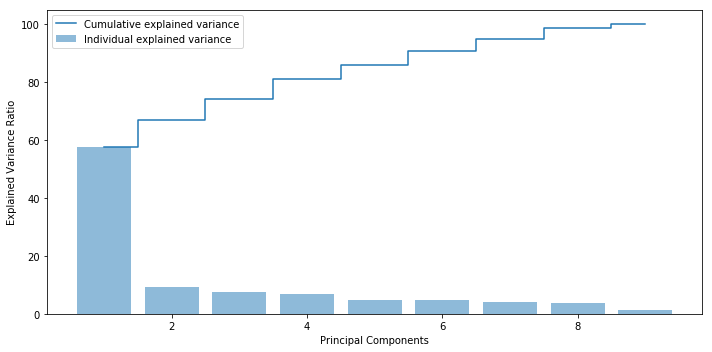

In [244]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [0]:
from sklearn.decomposition import PCA

In [0]:

pca = PCA()

In [0]:
X = pca.fit_transform(X) 


In [260]:

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.64146085, 0.10654322, 0.07407465, 0.05891574, 0.0412067 ,
       0.02982652, 0.02286171, 0.01711763, 0.00799298])

# Q10 Find correlation between components and features

In [0]:
data = pd.DataFrame(X)

In [363]:
data.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000e+00,5.121110e-18,2.974911e-17,-4.820692e-17,1.374580e-17,-1.028383e-16,-3.454798e-17,1.179479e-17,3.797835e-18
1,5.121110e-18,1.000000e+00,2.288959e-16,-2.921934e-17,-7.614643e-17,5.195125e-17,5.792652e-18,1.559300e-17,1.326132e-16
2,2.974911e-17,2.288959e-16,1.000000e+00,5.251139e-17,2.922771e-16,-1.704121e-17,5.453922e-17,-6.221223e-17,-5.313973e-17
3,-4.820692e-17,-2.921934e-17,5.251139e-17,1.000000e+00,-2.702019e-16,-3.226976e-17,-8.777742e-17,-3.173888e-16,5.269687e-17
4,1.374580e-17,-7.614643e-17,2.922771e-16,-2.702019e-16,1.000000e+00,-2.990586e-17,1.535533e-16,-3.069459e-16,2.491190e-16
5,-1.028383e-16,5.195125e-17,-1.704121e-17,-3.226976e-17,-2.990586e-17,1.000000e+00,3.200319e-16,3.188164e-17,-1.305128e-16
6,-3.454798e-17,5.792652e-18,5.453922e-17,-8.777742e-17,1.535533e-16,3.200319e-16,1.000000e+00,3.919580e-16,1.859548e-16
7,1.179479e-17,1.559300e-17,-6.221223e-17,-3.173888e-16,-3.069459e-16,3.188164e-17,3.919580e-16,1.000000e+00,2.318354e-16
8,3.797835e-18,1.326132e-16,-5.313973e-17,5.269687e-17,2.491190e-16,-1.305128e-16,1.859548e-16,2.318354e-16,1.000000e+00


# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [0]:
import io

In [232]:
from google.colab import files
uploaded1  = files.upload()

Saving jokes.csv to jokes (3).csv


In [0]:
data_raw_jk = pd.read_csv(io.BytesIO(uploaded1['jokes.csv']))

data_train_jk = data_raw_jk.copy(deep=True)

# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [340]:
data_train_jk.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [341]:
data_train_jk.shape

(24983, 101)

In [0]:
data_train_jk = data_train_jk.drop(columns='NumJokes')

In [0]:
data_train_jk1 = data_train_jk.iloc[0:200,0:101]

In [344]:
data_train_jk1.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [0]:
value = np.arange(0,100)

In [346]:
value

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
col= data_train_jk1.columns

In [0]:
col_nm = dict(zip(col,value))

In [0]:
data_train_jk1.rename(columns  = col_nm, inplace = True) 

In [350]:
data_train_jk1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [0]:
data_train_jk1.replace(99.00,0,inplace=True)

# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


ratings_diff = sc.fit_transform(np.array(data_train_jk1))  # scale training and test data independently to prevent data leaks


### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [0]:
ratings_diff_df = pd.DataFrame(ratings_diff)

In [354]:
ratings_diff_df.mean().nlargest(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64